In [1]:
import os, sys, csv
from dateutil.relativedelta import relativedelta
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from konlpy.tag import *


font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() # 이게 있어야 한글로 나타남
mpl.rc('font', family=font_name)

In [2]:
file_list = os.listdir("python") # python 폴더에 있는 파일리스트 출력
print (file_list)




['가스발전_뉴스.csv', '수력발전_뉴스.csv', '원자력_뉴스.csv', '화력발전_뉴스.csv']


In [3]:
gas = []
water = []
radio = []
flame = []

for i in file_list: # 각 파일마다 읽음
    month_freq = []
    count = 0
    freq = count
    now = datetime.date(2017, 5, 1) # 현재시간 설정
    end = datetime.date(2018, 10, 31) # 마지막시간 설정
    with open("python/" + i) as f:
        reader = csv.DictReader(f) # csv읽는 메소드
        for row in reader:
            date = row['article_date'].split(" ") # 날짜의 YYYY-MM-DD로 가져옴
            year = int(date[0].split("-")[0]) # -단위로 나눠서 년도월일로 나눔
            month = int(date[0].split("-")[1])
            day = int(date[0].split("-")[2])
            tom = now + relativedelta(months = 1) # 다음 달
            time = datetime.date(year, month, day) # 추출한 날짜
            count += 1
            if (time - now).days >= 0 and (time - tom).days <= -1: # 추출한 날짜가 원하는 달일때(현재달과 다음달 사이일 때)
                now += relativedelta(months = 1) # 1달 증가
                freq = count - freq # 해당 달에 기사 갯수
                
                if(count != 1): # 처음은 안넣음
                    month_freq.append(freq) # 갯수 입력
                    freq = count # 입력했으니 초기솨
            if((time - now).days >= 30): #해 당 달에 값이 없는경우 그만큼 0 넣고 건너뜀
                freq = count - freq
                month_freq.append(freq)
                freq = count
                a = int((time-now).days / 30) + 1 # 없는 달만큼 0 넣음
                for i in range (0, a):
                    now += relativedelta(months = 1)
                    month_freq.append(0)
                month_freq.pop(-1) # 0이 한번 더 들어가서 강제로 뺌
        freq = count - freq + 1 # 갯수세는것이기에 +1해야 숫자 맞음
        month_freq.append(freq) # 마지막 달 조회수 넣음
    
    if(len(gas) == 0): # 각 배열에 입력해줍니다.
        gas = month_freq
        gas.append(0) # 마지막 0이 계산안되기에 넣어줌
    elif(len(water) == 0):
        water = month_freq
    elif(len(radio) == 0):
        radio = month_freq
    else:
        flame = month_freq
print ("가스") # 각 데이터 별로 월별 조회수 제대로 들어갔는지 확인
print (gas)
print ("수력")
print (water)
print ("원자력")
print (radio)
print ("화력")
print (flame)


가스
[68, 138, 89, 53, 68, 90, 40, 51, 54, 25, 27, 44, 36, 43, 30, 59, 97, 0]
수력
[393, 936, 946, 415, 387, 998, 634, 350, 367, 402, 250, 272, 345, 601, 1469, 714, 233, 165]
원자력
[1442, 2889, 4282, 2653, 2797, 4591, 2238, 2055, 1452, 1130, 1729, 1631, 3178, 2966, 2435, 2028, 1092, 1]
화력
[1017, 1175, 888, 668, 709, 530, 651, 553, 476, 451, 205, 1, 1, 0, 0, 0, 1, 537]


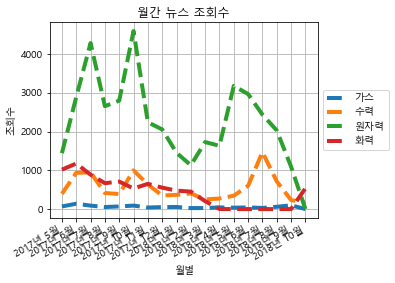

In [5]:
month = []
i = 5
for i in range (i, 23):
    j = 7
    if(i > 12):
        i -= 12
        j += 1
    month.append("201" + str(j) + "년 " + str(i) + "월") # 2017년 5월 ~ 2018년 10월 x축 생성
%matplotlib inline

plt.title("월간 뉴스 조회수") # 그래프 제목
plt.xlabel('월별') # 그래프 x축
plt.ylabel('조회수') # 그래프 y축


plt.plot(month, gas, '--', label="가스") # 각 데이터들 입력 --은 점선
plt.plot(month, water, '--', label="수력")
plt.plot(month, radio, '--', label="원자력")
plt.plot(month, flame, '--', label="화력")
plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True


plt.gcf().autofmt_xdate() # x축 이름을 깔끔하게 해줌

ax = plt.subplot(111) # 레이블을 표 밖으로
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# 처음 실행시에는 적용이 잘 안되지만 두번째에는 제대로 적용됩니다
# 인자를 중복해서 그런 듯 한데 matplotlib을 처음써봐서 넘어갔습니다.

In [6]:
okt = Okt() # konlpy에서 okt를 사용

all_noun = []

gas = []
water = []
radio = []
flame = []
for i in file_list: # 각 데이터별로 
    with open("python/" + i) as f:
        reader = csv.DictReader(f) # csv읽는 메소드
        for row in reader: # 모든 내용을 모아서 배열에 입력 (원래 제목과 내용으로 하려했으나 데이터가 커져서 memory오류발생.)
            #all_noun.append(row['Title'])
            all_noun.append(row['article_body'])
    if(i == "가스발전_뉴스.csv"): # 각 데이터별로 입력
        gas = all_noun
    elif(i == "수력발전_뉴스.csv"):
        water = all_noun
    elif(i == "원자력_뉴스.csv"):
        radio = all_noun
    else:
        flame = all_noun
    all_noun = []
        

f = open("gas.txt", "w") # txt파일로 생성, 반복문 이용하려했으나 실패
for i in range (0, len(gas)):
    f.write(gas[i])
f.close()

f = open("water.txt", "w")
for i in range (0, len(water)):
    f.write(water[i])
f.close()

f = open("radio.txt", "w")
for i in range (0, len(radio)):
    f.write(radio[i])
f.close()

f = open("flame.txt", "w")
for i in range (0, len(flame)):
    f.write(flame[i])
f.close()